# Miles Currie and Steven Stetzler
## Exoplanets HW 1a

In [1]:
using Pkg
Pkg.add("PyPlot")
using PyPlot;

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


# Newton's Method

We make a function to optimize over. The function $g = 0$ for all $E$, $e$, $M$. 

In [2]:
function g(E, e, M)
    return E - e*sin(E) - M
end;

Derivative of function to optimize with respect to the optimization variable

In [3]:
function dgdE(E, e)
    return 1 - e*cos(E)
end;

The core of newton's method:

- Initialize $E_0 = M + 0.85 * e * \text{sign} ( \sin ( M ) )$
- Iterate until convergence on E:
  
  Compute: $ \frac{\partial g}{\partial E} = 1 - e * \cos(E) $
  
  $ E_{i + 1} = E_{i} - \frac{g(E, e, M)}{\partial g / \partial E} $


In [4]:
function kepler_solver(M, e)
    E0 = M + 0.85*e*sign(sin(M))
    g0 = g(E0, e, M)
    dgdE0 = dgdE(E0, e)
    while abs(-g(E0, e, M)/dgdE(E0, e)) > 1E-14
        E = E0 - g(E0, e, M)/dgdE(E0, e)
        E0 = E
    end
    return E0
end;

For a different values of $e \in (0, 1)$ and $M \in (0, 2 \pi)$, compute $E(M)$ using Newton's Method

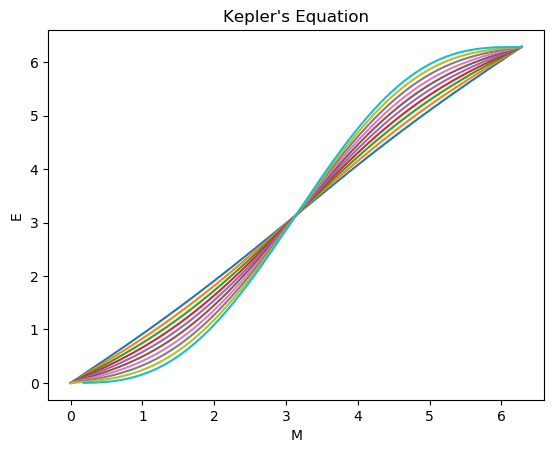

In [5]:
elist = range(0.1, stop=1, length=10)
Mlist = range(0.001, stop=2*pi, length=1000)
for e in elist
    Elist = []
    for M in Mlist
        E = kepler_solver(M, e)
        append!(Elist, E)
    end
    plot(Elist, Mlist)
end
ylabel("E")
xlabel("M")
title("Kepler's Equation");

For a different values of $e \in (0, 1)$ and $M \in (0, 2 \pi)$, compute $g$ and show how close it is to 0, which is our optimization requirement.

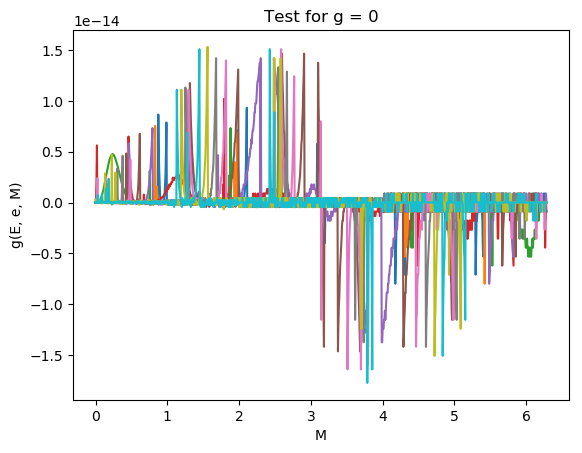

In [6]:
elist = range(0.1, stop=1, length=10)
Mlist = range(0.001, stop=2*pi, length=1000)
for e in elist
    Elist = []
    glist = []
    for M in Mlist
        E = kepler_solver(M, e)
        append!(glist, g(E, e, M))
        append!(Elist, E)
    end
    plot(Mlist, glist)
end
ylabel("g(E, e, M)")
xlabel("M")
title("Test for g = 0");